Preorder traversal of binary tree is:
5 2 1 3 4 8 6 11 9 10 
Visual representation of the binary tree:


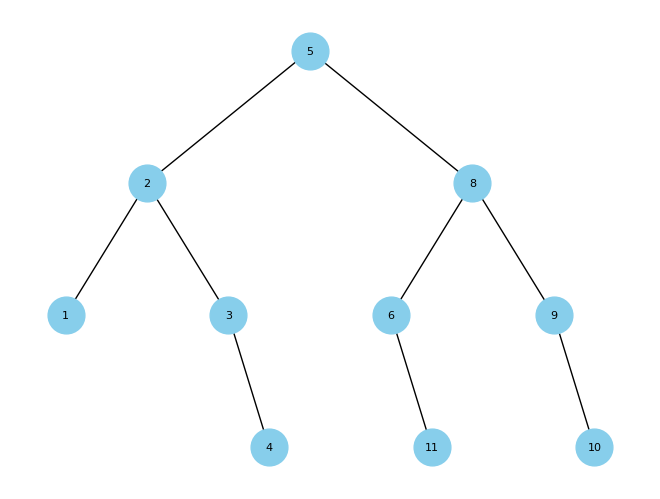

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

class TreeNode:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

def build_balanced_tree(numbers, start, end):
    if start > end:
        return None

    mid = (start + end) // 2
    root = TreeNode(numbers[mid])

    root.left = build_balanced_tree(numbers, start, mid - 1)
    root.right = build_balanced_tree(numbers, mid + 1, end)

    return root

def print_preorder(node):
    if node is not None:
        print(node.value, end=' ')
        print_preorder(node.left)
        print_preorder(node.right)

def visualize_tree(tree):
    G = nx.Graph()
    pos = {}

    def add_nodes_edges(node, parent=None, x=0, y=0, layer=1, width=2.0, vert_gap=0.4):
        if node is None:
            return

        G.add_node(node.value, pos=(x, -layer * vert_gap))
        if parent is not None:
            G.add_edge(parent.value, node.value)

        add_nodes_edges(node.left, node, x=x - width / 2.0, y=y - 1, layer=layer + 1, width=width / 2.0, vert_gap=vert_gap)
        add_nodes_edges(node.right, node, x=x + width / 2.0, y=y - 1, layer=layer + 1, width=width / 2.0, vert_gap=vert_gap)

    add_nodes_edges(tree)

    # Draw the graph
    labels = {node: node for node in G.nodes()}
    nx.draw(G, pos=nx.get_node_attributes(G, 'pos'), with_labels=True, labels=labels,
            node_size=700, node_color="skyblue", font_size=8, font_color="black")
    plt.show()

# Example usage:
numbers = [1, 2, 3, 4, 5, 6, 11 , 8, 9, 10]
root = build_balanced_tree(numbers, 0, len(numbers) - 1)

print("Preorder traversal of binary tree is:")
print_preorder(root)

print("\nVisual representation of the binary tree:")
visualize_tree(root)
